### Feature Exteaction with Eigen Face

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
### Eigen Face
from sklearn.decomposition import PCA

import pickle 

In [4]:
#Load the data
data = pickle.load(open('./data/data_images_100_100.pkl',mode='rb')) #Load the data


In [5]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


### Eigen Face

In [8]:
#Mean Face
X = data.drop('gender',axis=1).values #all images

In [9]:
X.shape


(4321, 10000)

In [10]:
mean_face = X.mean(axis=0) #flatten mean face
mean_face.shape

(10000,)

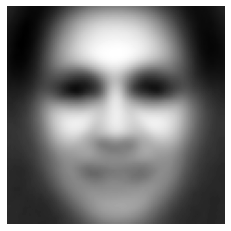

In [12]:
#visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

Subtract data with mean face

In [13]:
X_t = X - mean_face  #transformed data

**Apply X_t data to PCA**

- Find the right num of component - Elbow method
- With right num com computer Principal components 

In [14]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [15]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.252125,0.252125,1
1,0.113728,0.365853,2
2,0.105726,0.471578,3
3,0.051616,0.523194,4
4,0.033376,0.556570,5


In [16]:
exp_var_df.set_index('principal_components',inplace=True)

<Axes: xlabel='principal_components'>

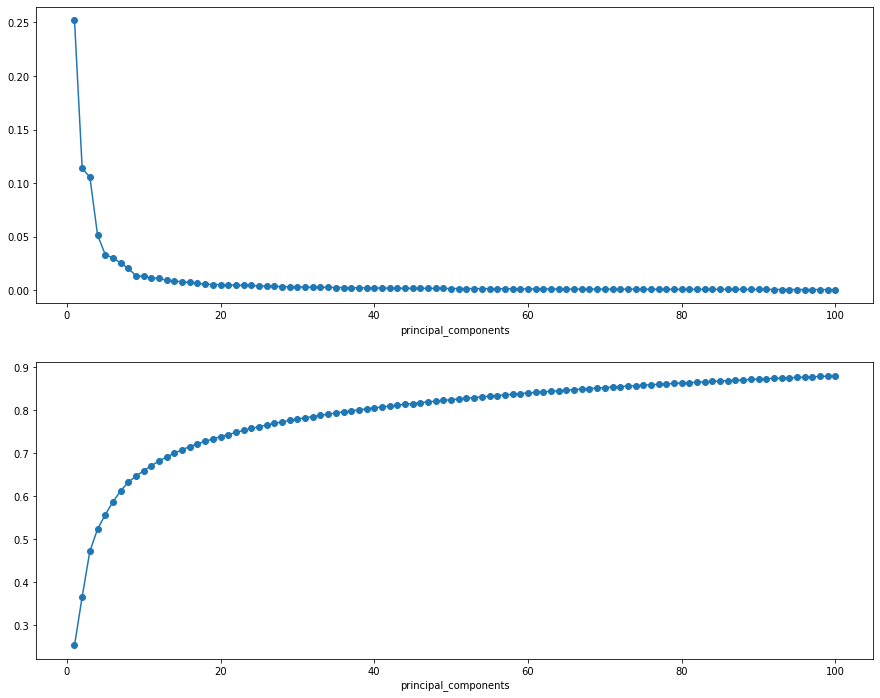

In [19]:
#visualize explained variance
fig,ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker = 'o' ,ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker = 'o' ,ax=ax[1])

From above plot, it is clear that with approximately **50 pricipal components having 80%** converage.

In [20]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [21]:
pca_data.shape

(4321, 50)

In [22]:
#saving data and models
y= data['gender'].values #independent variables
np.savez('./data/data_pca_50_target',pca_data,y)

In [23]:
#saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}
pickle.dump(pca_dict,open('model/pca_dict.pkl','wb'))

### Visualize Eigen Image

In [28]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [29]:
pca_data_inv.shape

(4321, 10000)

In [30]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(-0.5, 99.5, 99.5, -0.5)

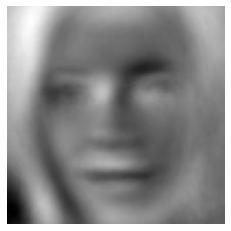

In [31]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

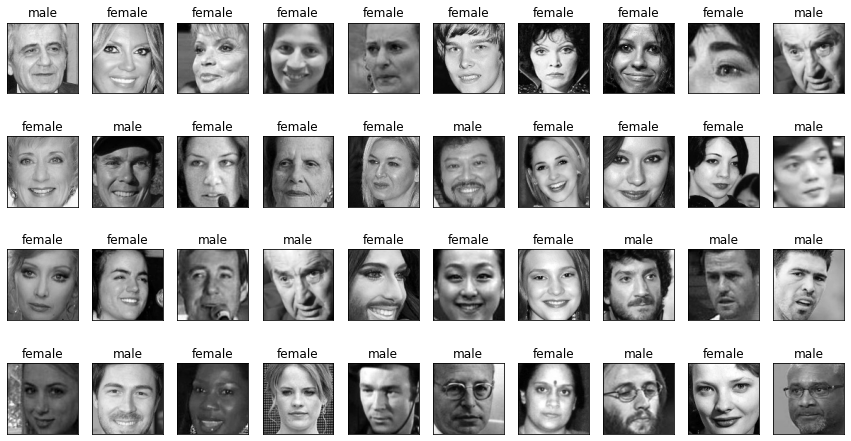

====================Eigen Images====================


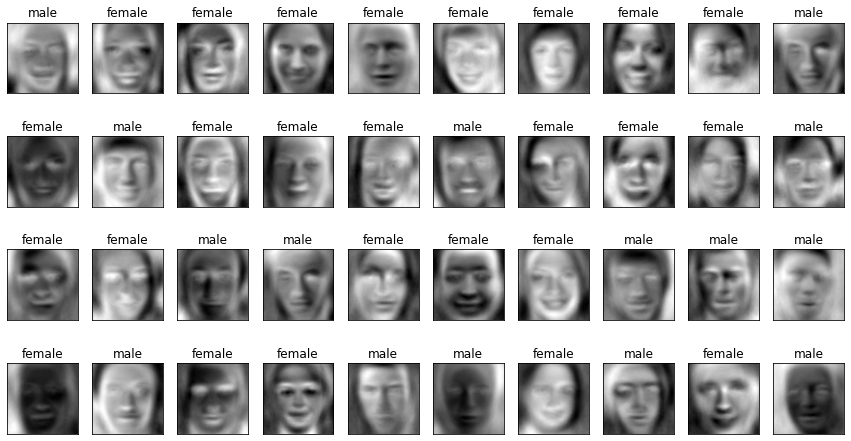

In [32]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])

plt.show()